In [32]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals
%config InlineBackend.figure_format = 'svg'  ###配置可以保存为矢量图
%matplotlib inline 
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import seaborn as sns
import scipy as sp # scientific computation library
# from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split #cross_validation
from sklearn.metrics import mean_squared_error

## 4.1.1 第二范数正则化梯度下降求w

(100, 1)
(100, 1)
(70, 1)
(30, 1)


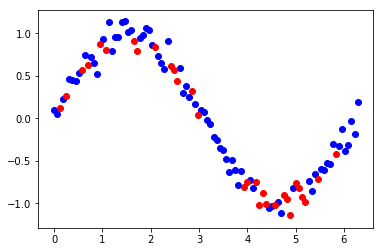

In [133]:
def f(x):
    y=np.sin(x)
    return y
# X=np.arange(0,2*np.pi,0.2,dtype='float32')
# sample_size=2*np.pi/0.2
sample_size=100
X=np.linspace(0,2*np.pi,sample_size)
y=f(X)+np.random.normal(0,0.1,sample_size) 
y=np.atleast_2d(y).T
print(y.shape)
X = np.atleast_2d(X).T  #
print(X.shape)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=40)  
print(X_train.shape)
print(X_test.shape)
plt.scatter(X_train,y_train, c='b')
plt.scatter(X_test, y_test, c='r')

In [34]:
from sklearn.preprocessing import PolynomialFeatures
#1到5次函数拟合,求出design matrix A
# Amot=[]
# for d in range(5):
#     polyfeat = PolynomialFeatures(degree =d+1, include_bias = True)
#     A_sklearn = polyfeat.fit_transform(X) 
#     print(A_sklearn.shape)
#     Amot.append(A_sklearn)
    
polyfeat1 = PolynomialFeatures(degree =1, include_bias = True)
A_sklearn1 = polyfeat1.fit_transform(X) 
print(A_sklearn1.shape)

polyfeat2 = PolynomialFeatures(degree =2, include_bias = True)
A_sklearn2 = polyfeat2.fit_transform(X) 
print(A_sklearn2.shape)

polyfeat3 = PolynomialFeatures(degree =3, include_bias = True)
A_sklearn3 = polyfeat3.fit_transform(X) 
print(A_sklearn3.shape)

polyfeat4 = PolynomialFeatures(degree =4, include_bias = True)
A_sklearn4 = polyfeat4.fit_transform(X) 
print(A_sklearn4.shape)

polyfeat5 = PolynomialFeatures(degree =5, include_bias = True)
A_sklearn5 = polyfeat5.fit_transform(X) 
print(A_sklearn5.shape)

(100, 2)
(100, 3)
(100, 4)
(100, 5)
(100, 6)


In [35]:
'''
in: Xmat 1*N
out: X add a column of ones to N*2 matrix, N*3
'''
def designmat1(Xmat): # Xmat 2*N times, N:numbers of datasets
#     print('Xmat',Xmat.shape) #50
    #(1) assemble each input vector as a row 
    X = np.atleast_2d(Xmat).T  #to 2d array then transpose, N*2
    #(2) add a column of ones to N*2 matrix
    col1 = np.ones(np.shape(X)[0]).reshape(np.shape(X)[0],1) #the column vector which consists of n ones
    # reshapte refers to ravel a array, this convert to N*1
    X = np.concatenate((col1, X), axis=1) #Join a sequence of arrays:X along an existing axis.
    n,p=X.shape
    print('X',n,p)
#     print('X=',X)
    return X

In [46]:
'''
梯度下降函数
w:p*1(p为拟合次数)
X:n*p(n为数据集个数),为design matrix
y:n*1
l2是lambda,正则化参数
core是学习率=1, 0.000000006,  rate = 0.001
初值w,rate,n_iterations=50都是由自己给定的
'''
def reg_gradientdescent(w, X, y,l2,core=1, rate = 0.001, n_iterations = 100):
    wtseq = [w] #列表
#     whistory = []
    losshistory = [] 
    
    for iteration in range(n_iterations):
#         whistory.append(w)
        w_without_t0=w[1:]  #把截距项去掉
        meanrss = 0.5*np.square(y-X.dot(w)).mean()+0.5*l2*np.sum(np.square(w_without_t0)) #标量
#         print(meanrss)
        losshistory.append(meanrss)
        w_with_t0_0=np.r_[np.zeros([1,1]),w[1:]]  #set w[0]=0,不考虑截距项
#         gradients =  core*2/len(X) * X.T.dot(X.dot(w) - y) + \
#                      + 2 * l2 * w_with_t0_0
#         gradients =  core*1/len(X) * X.T.dot(X.dot(w) - y) + \
#                      + 1 * l2 * w_with_t0_0
        gradients =  core*2/len(X) * X.T.dot(X.dot(w) - y) + 2 * l2 * w
        w = w - rate * gradients 
        
#         if(iteration==0):
#             print(w.shape)    #2*1
        wtseq.append(w) 
#         if(iteration==0):
#             print(wtseq)
#     whist=np.asarray(whistory)
    whist=np.asarray(wtseq)
    meanlosstrace=np.asarray(losshistory)
    return  w, whist, meanlosstrace


In [37]:
# def reg_gradientdescent(w, X, y,l2, core=1, rate = 0.1, n_iterations = 50):
#     wtseq = [w]
#     losshistory = [] 
#     for iteration in range(n_iterations):
#         meanrss = np.square(y-X.dot(w)).mean()
#         gradients =  core*2/len(X) * X.T.dot(X.dot(w) - y) + 2 * l2 * w
#         w = w - rate * gradients
#         wtseq.append(w)
#         losshistory.append(meanrss)
#     return w, np.array(wtseq),np.array(losshistory)

In [38]:
# def gradsqloss(Amat, y, wt):
#     n, p = Amat.shape
#     return (-2/n)*Amat.T.dot((y-Amat.dot(wt))+2 * l2 * wt)

# def reg_gradientdescent(Amat, y, winit, rate, l2,numiter):
#     n, p = Amat.shape
#     whistory = []
#     meanrsshistory = [] 
#     w = winit
    
#     for i in range(numiter): 
#         meanrss = np.square(y-Amat.dot(w)).mean()
#         whistory.append(w)
#         meanrsshistory.append(meanrss)
#         grad = gradsqloss(Amat, y, w)
#         w = w - rate*grad
#     return w, np.asarray(whistory), np.asarray(meanrsshistory)

In [47]:
# wt_init = np.array([[-0.5], [-1]])  ###2*1,不是一个一维数组
n, p = A_sklearn1.shape
wt_init = np.random.randn(p)
print(wt_init.shape)
wt_init=np.atleast_2d(wt_init).T
print(wt_init.shape)
# wt_init=[[-0.5],[-0.1]]
numiter=50
rate=0.001
l2=0.0001
# wfin, whist, meanlosstrace= reg_gradientdescent(A_sklearn1,y,wt_init,rate,l2,numiter)
wfin, whist, meanlosstrace= reg_gradientdescent(wt_init,A_sklearn1,y,l2)
# print(w_path)
# print(w_path.shape) #51*2*1

(2,)
(2, 1)


(2,)
(2, 1)
Initial weight: [[1.76405235]
 [0.40015721]]
wfin= [[ 0.97736948]
 [-0.30658686]]


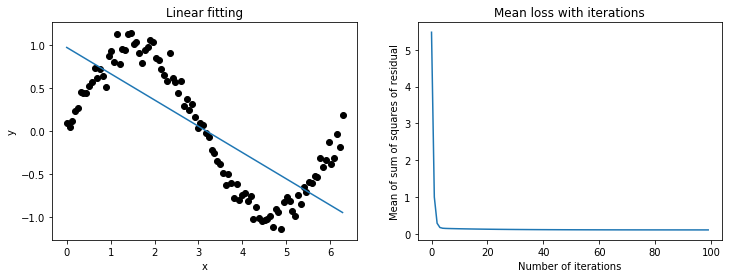

In [165]:
# 一次拟合
# w0=(-2.5,2.5)+np.random.randn(2)
# print(w0.shape)
np.random.seed(0)
n_iterations=50
l2=0.0001
n, p = A_sklearn1.shape
wt_init = np.random.randn(p)
print(wt_init.shape)
wt_init=np.atleast_2d(wt_init).T
print(wt_init.shape)
# wt_init=[[0.3],[0.1]]
print("Initial weight:", wt_init)
wfin, whist, meanlosstrace = reg_gradientdescent(wt_init, A_sklearn1, y, l2,n_iterations)
fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(12,4)) #画一行两列
ax[0].scatter(X,y,marker='o',color='k')
print("wfin=",wfin)
ax[0].plot(X,wfin[0]+wfin[1]*X)  #拟合的曲线
ax[1].plot(meanlosstrace)  #误差曲线
ax[0].set_title("Linear fitting")
ax[0].set_xlabel("x")
ax[0].set_ylabel("y")
ax[1].set_title("Mean loss with iterations")
ax[1].set_xlabel("Number of iterations")
ax[1].set_ylabel("Mean of sum of squares of residual")
plt.savefig('fit1.pdf', bbox_inches='tight')

(3,)
Initial weight: [[1.76405235]
 [0.40015721]
 [0.97873798]]
wfin= [[ 1.54332174]
 [ 0.14952383]
 [-0.11133115]]


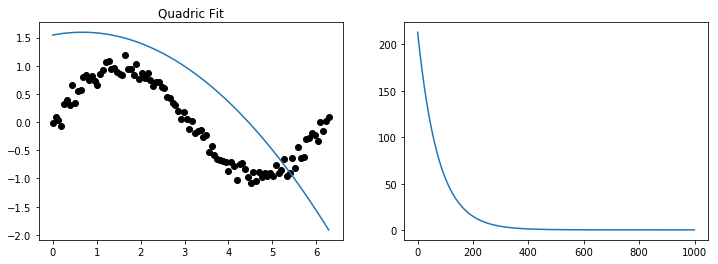

In [56]:
# 二次拟合
np.random.seed(0)
n, p = A_sklearn2.shape
wt_init = np.random.randn(p)
print(wt_init.shape)
wt_init=np.atleast_2d(wt_init).T  #p*1
# wt_init=[[0.3],[0.1],[0.1]]
print("Initial weight:", wt_init)
core=1
l2=5
rate=10**(-5)
n_iterations=1000
wfin, whist, meanlosstrace = reg_gradientdescent(wt_init, A_sklearn2, y,l2,core,rate,n_iterations)
fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(12,4)) #画一行两列
ax[0].scatter(X,y,marker='o',color='k')
# y_predict=
print("wfin=",wfin)
y_pridict= A_sklearn2.dot(wfin)
ax[0].plot(X,y_pridict)  #拟合的曲线
ax[0].set_title("Quadric Fit")
ax[1].plot(meanlosstrace)  #误差曲线

(4,)
(4, 1)
Initial weight: [[-0.05125456]
 [ 1.63637689]
 [-0.78471995]
 [ 0.08447873]]
wfin= [[-0.05088581]
 [ 1.62508532]
 [-0.77931446]
 [ 0.08387402]]


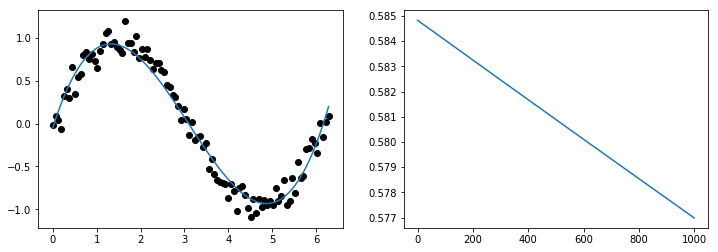

In [126]:
#三次拟合
np.random.seed(0)
n, p = A_sklearn3.shape
wt_init = np.random.randn(p)
print(wt_init.shape)
wt_init=np.atleast_2d(wt_init).T
print(wt_init.shape)
# wt_init=[[0.3],[0.1],[0.1],[0.1]]
wt_init=np.array([[-0.05125456],[ 1.63637689],[-0.78471995],[ 0.08447873]])
print("Initial weight:", wt_init)
core=1
l2=0.35 #0.0005 #20
rate=10**(-5)
n_iterations=1000
wfin, whist, meanlosstrace = reg_gradientdescent(wt_init, A_sklearn3, y, l2,core,rate,n_iterations)
fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(12,4)) #画一行两列
ax[0].scatter(X,y,marker='o',color='k')
# y_predict=
print("wfin=",wfin)
y_pridict= A_sklearn3.dot(wfin)
ax[0].plot(X,y_pridict)  #拟合的曲线
ax[1].plot(meanlosstrace)  #误差曲线
plg.sav

(5,)
(5, 1)
Initial weight: [[ 0.03268925]
 [ 1.30413531]
 [-0.52649501]
 [ 0.01777361]
 [ 0.00544374]]
wfin= [[ 0.03268948]
 [ 1.30414441]
 [-0.52649868]
 [ 0.01777375]
 [ 0.00544378]]


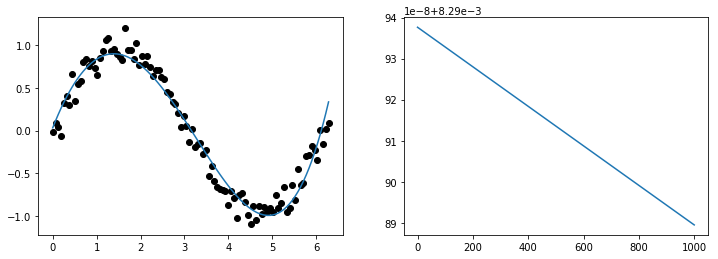

In [128]:
#四次拟合
np.random.seed(0)
n, p = A_sklearn4.shape
wt_init = np.random.randn(p)
print(wt_init.shape)
wt_init=np.atleast_2d(wt_init).T
print(wt_init.shape)
wt_init=np.array([[ 0.03268925],[ 1.30413531],[-0.52649501],[ 0.01777361],[ 0.00544374]])
print("Initial weight:", wt_init)
core=1
l2=10**(-5)
rate=10**(-6)
n_iterations=1000
wfin, whist, meanlosstrace = reg_gradientdescent(wt_init, A_sklearn4, y, l2,core,rate,n_iterations)
fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(12,4)) #画一行两列
ax[0].scatter(X,y,marker='o',color='k')
# y_predict=
print("wfin=",wfin)
y_pridict= A_sklearn4.dot(wfin)
ax[0].plot(X,y_pridict)  #拟合的曲线
ax[1].plot(meanlosstrace)  #误差曲线

(6,)
(6, 1)
Initial weight: [[ 0.06609572]
 [ 0.76199846]
 [ 0.30174765]
 [-0.39249996]
 [ 0.08598679]
 [-0.00544834]]
wfin= [[ 0.06609577]
 [ 0.76199899]
 [ 0.30174786]
 [-0.39250023]
 [ 0.08598685]
 [-0.00544834]]


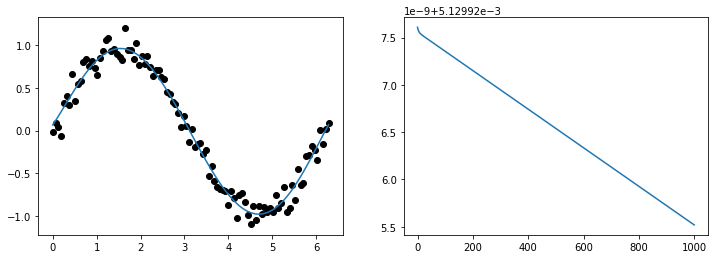

In [130]:
#五次拟合
np.random.seed(0)
n, p = A_sklearn5.shape
wt_init = np.random.randn(p)
print(wt_init.shape)
wt_init=np.atleast_2d(wt_init).T
print(wt_init.shape)
wt_init=np.array([[ 0.06609572],[ 0.76199846],[ 0.30174765],[-0.39249996],[ 0.08598679],[-0.00544834]])
print("Initial weight:", wt_init)
core=1
l2=10**(-5)
rate=10**(-7)
n_iterations=1000
wfin, whist, meanlosstrace = reg_gradientdescent(wt_init, A_sklearn5, y, l2,core,rate,n_iterations)
fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(12,4)) #画一行两列
ax[0].scatter(X,y,marker='o',color='k')
# y_predict=
print("wfin=",wfin)
y_pridict= A_sklearn5.dot(wfin)
ax[0].plot(X,y_pridict)  #拟合的曲线
ax[1].plot(meanlosstrace)  #误差曲线

## 4.1.2 Analytical expression

In [63]:
def ridgeRegres(xMat,yMat,lam=0.2):
#     print("xMat:",xMat.shape)
    xTx = np.dot(xMat.T,xMat)
    denom = xTx + np.eye(np.shape(xMat)[1])*lam
    if np.linalg.det(denom) == 0.0:
        print("This matrix is singular, cannot do inverse")
        return
    ws = np.dot(np.linalg.inv(denom), np.dot(xMat.T,yMat))  #np.linalg.pinv 求广义逆
    return ws


In [64]:
def ridgeRegres2(X,lam):
    U, S, V = np.linalg.svd(X.T.dot(X) + lam * np.identity(np.shape(X)[1]))
    S = np.diag(S)
    X_sq_reg_inv = V.dot(np.linalg.pinv(S)).dot(U.T)
    w = X_sq_reg_inv.dot(X.T).dot(y)
    return w

In [65]:
wfin=ridgeRegres(A_sklearn5,y,lam=10**(-5))
print(wfin)

[[-0.04017951]
 [ 1.10755172]
 [ 0.00897911]
 [-0.29113982]
 [ 0.07049721]
 [-0.00458029]]


wfin= [[ 0.06609572]
 [ 0.76199846]
 [ 0.30174765]
 [-0.39249996]
 [ 0.08598679]
 [-0.00544834]]
wfin= [[ 0.03268925]
 [ 1.30413531]
 [-0.52649501]
 [ 0.01777361]
 [ 0.00544374]]
wfin= [[-0.05125456]
 [ 1.63637689]
 [-0.78471995]
 [ 0.08447873]]
wfin= [[ 0.89707093]
 [-0.30276498]
 [ 0.00403395]]
wfin= [[ 0.87123567]
 [-0.27752985]]


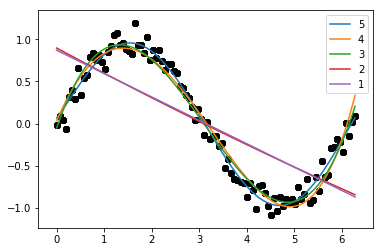

In [66]:
#####同一个lambda, 不同的次数拟合, 外面再加一个大循环用lambda
# fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(12,4)) #画一行两列
# lam=3  #10**(-5)
lam=0.35
wfin=ridgeRegres(A_sklearn5,y,lam)
plt.scatter(X,y,marker='o',color='k')
print("wfin=",wfin)
y_pridict= A_sklearn5.dot(wfin)
plt.plot(X,y_pridict,label=5)  #拟合的曲线

wfin=ridgeRegres(A_sklearn4,y,lam)
plt.scatter(X,y,marker='o',color='k')
print("wfin=",wfin)
y_pridict= A_sklearn4.dot(wfin)
plt.plot(X,y_pridict,label=4)  #拟合的曲线

wfin=ridgeRegres(A_sklearn3,y,lam)
plt.scatter(X,y,marker='o',color='k')
print("wfin=",wfin)
y_pridict= A_sklearn3.dot(wfin)
plt.plot(X,y_pridict,label=3)  #拟合的曲线

wfin=ridgeRegres(A_sklearn2,y,lam)
plt.scatter(X,y,marker='o',color='k')
print("wfin=",wfin)
y_pridict= A_sklearn2.dot(wfin)
plt.plot(X,y_pridict,label=2)  #拟合的曲线

wfin=ridgeRegres(A_sklearn1,y,lam)
plt.scatter(X,y,marker='o',color='k')
print("wfin=",wfin)
y_pridict= A_sklearn1.dot(wfin)
plt.plot(X,y_pridict,label=1)  #拟合的曲线

plt.legend()

In [75]:
#### 同一次数拟合, 不同的lambda

## 4.1.3 Plot the measure of the mean of the squared residuals

In [76]:
# 同一lambda,不同次数多项式的拟合,train集得到拟合系数,design matrix由train集得到,test集测试
# lamb=3
lamb=0.35
polyfeat1 = PolynomialFeatures(degree =1, include_bias = True)
A_train_sklearn1 = polyfeat1.fit_transform(X_train) 
wtrain1=ridgeRegres(A_train_sklearn1,y_train,lamb)
print(wtrain1)

polyfeat2 = PolynomialFeatures(degree =2, include_bias = True)
A_train_sklearn2 = polyfeat2.fit_transform(X_train) 
wtrain2=ridgeRegres(A_train_sklearn2,y_train,lamb)
print(wtrain2)

polyfeat3 = PolynomialFeatures(degree =3, include_bias = True)
A_train_sklearn3 = polyfeat3.fit_transform(X_train) 
wtrain3=ridgeRegres(A_train_sklearn3,y_train,lamb)
print(wtrain3)

polyfeat4 = PolynomialFeatures(degree =4, include_bias = True)
A_train_sklearn4 = polyfeat4.fit_transform(X_train) 
wtrain4=ridgeRegres(A_train_sklearn4,y_train,lamb)
print(wtrain4)

polyfeat5 = PolynomialFeatures(degree =5, include_bias = True)
A_train_sklearn5 = polyfeat5.fit_transform(X_train) 
wtrain5=ridgeRegres(A_train_sklearn5,y_train,lamb)
print(wtrain5)

[[ 0.81890774]
 [-0.24489484]]
[[ 0.87977343]
 [-0.3030341 ]
 [ 0.00908676]]
[[-0.00687639]
 [ 1.55070029]
 [-0.75373584]
 [ 0.08138993]]
[[ 7.94878682e-02]
 [ 1.17071860e+00]
 [-4.44243077e-01]
 [-1.08776151e-03]
 [ 6.86138646e-03]]
[[ 0.07983499]
 [ 0.72397695]
 [ 0.30532156]
 [-0.38352735]
 [ 0.08292332]
 [-0.00517737]]


In [153]:
'''
 Amat:n*p
 wfin:p*1
 '''
def fun_y_pridict(Amat,wfin):
    y_predict=Amat.dot(wfin)
    return y_predict

'''
 Amat:n*p
 wfin:p*1
 y:n*1,true value
 lamb:scalar
 '''
def fun_loss(w,Amat,y,lamb=10**(-5)):
     w_without_t0=w[1:]  #把截距项去掉
     meanrss= 0.5*np.square(y-Amat.dot(w)).mean()+0.5*lamb*np.sum(np.square(w_without_t0)) #标量
     meanrss2=0.5*mean_squared_error(Amat.dot(w),y)+0.5*lamb*np.sum(np.square(w_without_t0))
#      print("meanrss=",meanrss,meanrss2)  两者完全相等
     meanrss3=0.5*np.square(y-Amat.dot(w)).mean()+0.5*lamb*np.sum(np.square(w))
     return meanrss3

0.12095755943410148
0.12092644764363479
0.006127119330809584
0.005833035777402429
0.003272272341850821


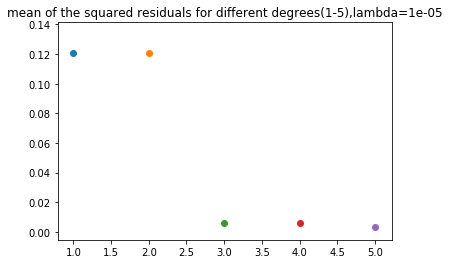

0.12099043568614502
0.120965413752276
0.006261195063330397
0.005903879301742812
0.003307270363846237


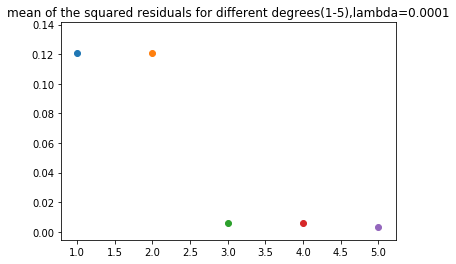

0.12131919820658053
0.12135507483868814
0.007601952388538527
0.006612314545146639
0.0036572505838003942


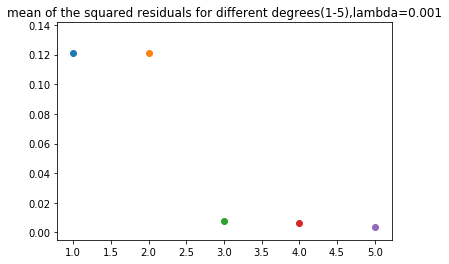

0.12460682341093555
0.1252516857028096
0.021009525640619822
0.01369666697918491
0.0071570527833419665


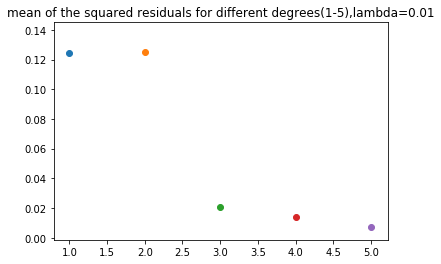

0.15748307545448578
0.164217794344024
0.1550852581614328
0.08454019131956762
0.042155074778757684


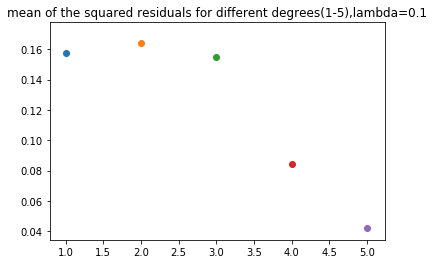

0.48624559588998806
0.5538788807561681
1.4958425833695623
0.7929754347233947
0.39213529473291486


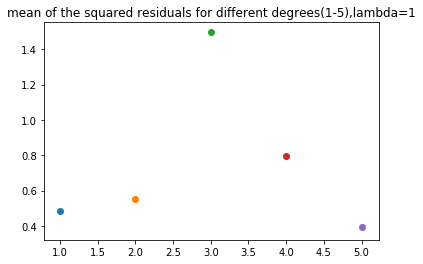

1.216828974635549
1.4197924061164884
4.475303306054295
2.3672759756207884
1.1698691168532642


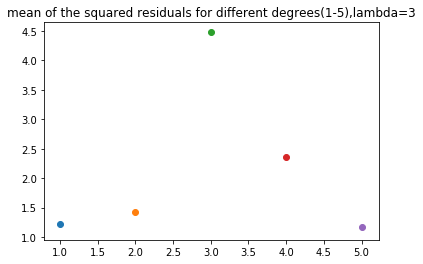

In [155]:
#由test集得到design matrix,用于在test集上预测
#同一个lambda, 不同的次数
lamb_array=[10**(-5),10**(-4),10**(-3),10**(-2),10**(-1),1,3]
for j in range(len(lamb_array)):
    polyfeat1 = PolynomialFeatures(degree =1, include_bias = True)
    Atext1 = polyfeat1.fit_transform(X_test) 

    polyfeat2 = PolynomialFeatures(degree =2, include_bias = True)
    Atext2 = polyfeat2.fit_transform(X_test) 

    polyfeat3 = PolynomialFeatures(degree =3, include_bias = True)
    Atext3 = polyfeat3.fit_transform(X_test) 

    polyfeat4 = PolynomialFeatures(degree =4, include_bias = True)
    Atext4 = polyfeat4.fit_transform(X_test) 

    polyfeat5 = PolynomialFeatures(degree =5, include_bias = True)
    Atext5 = polyfeat5.fit_transform(X_test) 

    # lamb=3
    lamb=10**(-5)
    meanloss1=fun_loss(wtrain1, Atext1, y_test,lamb_array[j])
    meanloss2=fun_loss(wtrain2, Atext2, y_test,lamb_array[j])
    meanloss3=fun_loss(wtrain3, Atext3, y_test,lamb_array[j])
    meanloss4=fun_loss(wtrain4, Atext4, y_test,lamb_array[j])
    meanloss5=fun_loss(wtrain5, Atext5, y_test,lamb_array[j])

    meanloss_list=[]
    meanloss_list.append(meanloss1)
    meanloss_list.append(meanloss2)
    meanloss_list.append(meanloss3)
    meanloss_list.append(meanloss4)
    meanloss_list.append(meanloss5)
    meanloss_array= np.asarray(meanloss_list)

    # y_predict1=fun_y_pridict(Atext1,wtrain1)
    # sns.residplot(X_test,y_predict1,order=1,scatter_kws={'color':'b'},label="1")

    # y_predict2=fun_y_pridict(Atext2,wtrain2)
    # sns.residplot(X_test,y_predict2,order=1,label="2")

    # y_predict3=fun_y_pridict(Atext3,wtrain3)
    # sns.residplot(X_test,y_predict3,order=1,label="3")

    # y_predict4=fun_y_pridict(Atext4,wtrain4)
    # sns.residplot(X_test,y_predict4,order=1,label="4")

    # y_predict5=fun_y_pridict(Atext5,wtrain5)
    # sns.residplot(X_test,y_predict5,order=1,label="5")


    # sns.residplot(X_test,y_test,order=1,scatter_kws={'color':'b'},label="1")

    # sns.residplot(X_test,y_test,order=2,label="2")  #多次拟合不行

    # sns.residplot(X_test,y_test,order=3,label="3")

    # sns.residplot(X_test,y_test,order=4,label="4")

    # sns.residplot(X_test,y_test,order=5,label="5")

    # title="the residuals distribution for different degrees(1-5),lambda=0.35"
    # plt.xlabel('x')  
    # plt.ylabel('residuals') 
    # plt.title(title)
    # plt.legend()

    fig,ax=plt.subplots(1,1)
    # ax.set_xlim([1,5])
    for i in range(5):
        print(meanloss_array[i])
        ax.scatter(i+1,meanloss_array[i])
        title="mean of the squared residuals for different degrees(1-5),lambda="+str(lamb_array[j])
        ax.set_title(title)
    plt.show()

[0.0052619259024158475, 0.005440627726773646, 0.007225950042929162, 0.0249111249732203, 0.186382954263467, 1.0250318330482773, 1.70514670459256]


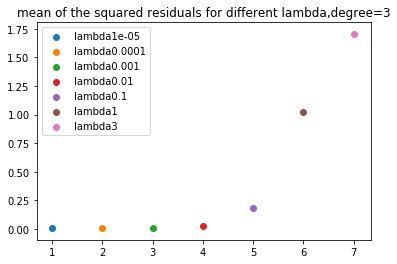

In [156]:
# 同一次数多项式的拟合,对应于不同lambda,train集得到拟合系数,test集测试
d=3
polyfeat = PolynomialFeatures(degree =3, include_bias = True)
Atext = polyfeat.fit_transform(X_test) 
lamb_array=[10**(-5),10**(-4),10**(-3),10**(-2),10**(-1),1,3]
# lamb_array=np.arange(0.1,1,0.1,dtype='float32')
# lamb_array=[10**(-5),10**(-3),1,3,10]
# print(len(lamb_array))
wfin_list=[]
ypredict_list=[]
meanloss_list=[]
for i in range(len(lamb_array)):
    wfin=ridgeRegres(A_train_sklearn3,y_train,lamb_array[i]) #p*1(p=6)
    wfin_list.append(wfin)
    y_predict=fun_y_pridict(Atext,wfin)  #n*1(n=30)
    meanloss=fun_loss(wfin, Atext, y_test,lamb_array[i])
    meanloss_list.append(meanloss)
#   sns.residplot(X_test,y_test,order=i+1,label="lambda"+str(i+1))
    
#     print(y_predict.shape)
#     ypredict_list.append(y_predict)
# wfin_array=np.asarray(wfin_list)
# ypredict_array=np.asarray(ypredict_list)
# print(ypredict_array.shape)

# title="the residuals distribution for different lambda,degree=3"
# plt.xlabel('x')  
# plt.ylabel('residuals') 
# plt.title(title)
# plt.legend()

# meanloss_array=np.asarray(meanloss_list)
print(meanloss_list)
fig,ax=plt.subplots(1,1)
# ax.set_xlim([1,5])
for i in range(len(lamb_array)):
    ax.scatter(i+1, meanloss_list[i],label="lambda"+str(lamb_array[i]))#"lambda"+str(i+1)
title="mean of the squared residuals for different lambda,degree="+str(d)
ax.set_title(title)
plt.legend()
plt.show()


## 4.2 Linear regression generalise

(90, 1)
(10, 1)
[[5.26772102]
 [3.36372547]
 [4.44265628]
 [2.85599332]
 [2.7925268 ]
 [2.47519421]
 [1.3962634 ]
 [5.07732146]
 [0.63466518]
 [0.        ]]


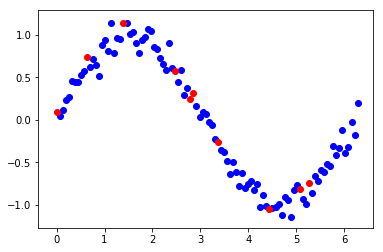

In [157]:
X_train_one,X_test_one,y_train_one,y_test_one=train_test_split(X,y,test_size=0.1,random_state=42)  
print(X_train_one.shape)
print(X_test_one.shape)
print(X_test_one)
plt.scatter(X_train_one,y_train_one, c='b')
plt.scatter(X_test_one,y_test_one, c='r')

### LeaveOneOut

In [158]:
from sklearn.model_selection import LeaveOneOut

loo = LeaveOneOut()
i=0
d=3
meanloss_list=[]
meanloss_mean_list=[]
meanloss_sum=0
for j in range(len(lamb_array)):
    i=0
    meanloss_sum=0
    meanloss_list=[]
    for train_index, test_index in loo.split(X):  #将样本分成100等分,留1份作为测试,一共重复100次
#     print("TRAIN:", train_index, "TEST:", test_index)
        X_train1, X_test1 = X[train_index], X[test_index]
        y_train1, y_test1 = y[train_index], y[test_index]
        i+=1
#     print(X_train, X_test, y_train, y_test)
#     print(X_train1.shape, X_test1.shape, y_train1.shape, y_test1.shape)
        polyfit = PolynomialFeatures(degree =d, include_bias = True)
        Amat = polyfit.fit_transform(X_train1) 
        Amat_test=polyfit.fit_transform(X_test1) 
        wfin=ridgeRegres(Amat,y_train1,lamb_array[j]) #p*1
#     wfin_list.append(wfin)
        y_predict=fun_y_pridict(Amat_test,wfin)  #n*1
        meanloss=fun_loss(wfin, Amat_test, y_test1,lamb_array[j])
        meanloss_list.append(meanloss)
#         print("meanloss="+str(meanloss))
#         meanloss_sum+=meanloss
#     meanloss_sum_mean=meanloss_sum/i
    meanloss_sum_mean=np.mean(meanloss_list)  #求得对于每个lamb每个留一验证的均值
#     print("meanloss_sum_mean="+str(meanloss_sum_mean))
    meanloss_mean_list.append(meanloss_sum_mean)  #记录对于每个lamb的meanloss的均值
#     print(i) 


[0.008225227504279516, 0.008405805605355232, 0.01021036314972987, 0.028134383748531146, 0.19596650118500242, 1.1975059080877573, 2.0732843020328184]


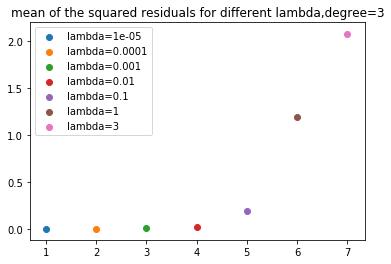

In [159]:
# meanloss_array=np.asarray(meanloss_list)
fig,ax=plt.subplots(1,1)
# ax.set_xlim([1,5])
print(meanloss_mean_list)
for i in range(len(lamb_array)):
    ax.scatter(i+1, meanloss_mean_list[i],label="lambda="+str(lamb_array[i]))
title="mean of the squared residuals for different lambda,degree="+str(d)
ax.set_title(title)
plt.legend()
plt.show()

In [160]:
from sklearn.model_selection import RepeatedKFold
X1 = np.array([[1, 2], [3, 4], [1, 2], [3, 4]])
random_state = 12883823
rkf = RepeatedKFold(n_splits=2, n_repeats=2, random_state=random_state)
for train, test in rkf.split(X1):
    print("%s %s" % (train, test))

[2 3] [0 1]
[0 1] [2 3]
[0 2] [1 3]
[1 3] [0 2]


### 10 Fold

In [161]:
from sklearn.model_selection import RepeatedKFold
random_state = 12883823
rkf = RepeatedKFold(n_splits=10, n_repeats=1, random_state=random_state)
i=0
d=3
meanloss_list=[]
meanloss_mean_list=[]
meanloss_sum=0
for j in range(len(lamb_array)):
    i=0
    meanloss_sum=0
    meanloss_list=[]
    for train_index, test_index in rkf.split(X):
#         print(train_index)
        X_train1, X_test1 = X[train_index], X[test_index]
        y_train1, y_test1 = y[train_index], y[test_index]
        i+=1
#     print(X_train, X_test, y_train, y_test)
#         print(X_train1.shape, X_test1.shape, y_train1.shape, y_test1.shape)
        polyfit = PolynomialFeatures(degree =d, include_bias = True)
        Amat = polyfit.fit_transform(X_train1) 
        Amat_test=polyfit.fit_transform(X_test1) 
        wfin=ridgeRegres(Amat,y_train1,lamb_array[j]) #p*1
#     wfin_list.append(wfin)
        y_predict=fun_y_pridict(Amat_test,wfin)  #n*1
        meanloss=fun_loss(wfin, Amat_test, y_test1,lamb_array[j])
        meanloss_list.append(meanloss)
#         print("meanloss="+str(meanloss))
#         meanloss_sum+=meanloss
#     meanloss_sum_mean=meanloss_sum/i
    meanloss_sum_mean=np.mean(meanloss_list)  #求得对于每个lamb每个验证的均值
#     print("meanloss_sum_mean="+str(meanloss_sum_mean))
    meanloss_mean_list.append(meanloss_sum_mean)  #记录对于每个lamb的meanloss的均值

[0.008351179815822148, 0.00853211329538001, 0.010340088156860126, 0.02828482498303022, 0.1951512493315707, 1.151597968928105, 1.9634998712575693]


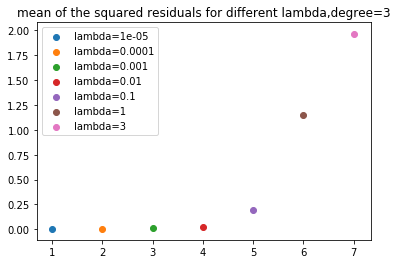

In [162]:
fig,ax=plt.subplots(1,1)
# ax.set_xlim([1,5])
print(meanloss_mean_list)
for i in range(len(lamb_array)):
    ax.scatter(i+1, meanloss_mean_list[i],label="lambda="+str(lamb_array[i]))
title="mean of the squared residuals for different lambda,degree="+str(d)
ax.set_title(title)
plt.legend()
plt.show()

In [163]:
[0.007053160226309376, 0.007233869726496547, 0.009039259932614192, 0.0269241245068834, 0.19020445084153323, 1.0005595341011517, 1.4322379170339086]

[0.007053160226309376,
 0.007233869726496547,
 0.009039259932614192,
 0.0269241245068834,
 0.19020445084153323,
 1.0005595341011517,
 1.4322379170339086]